In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
datetime.datetime.strptime
from pandas import to_datetime
import seaborn as sn
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr, iqr

In [2]:
# Legge il CSV
df = pd.read_csv('../../customer_supermarket.csv', sep='\t', index_col=0)
# Trasforma il campo "Sale" in un float
df["Sale"] = df["Sale"].str.replace(",", ".").astype(float)
# Trasforma il campo "BasketDate" in un datetime
df["BasketDate"] = pd.to_datetime(df["BasketDate"])

df

BasketID          BasketDate   Sale  CustomerID CustomerCountry  \
0        536365 2010-01-12 08:26:00   2.55     17850.0  United Kingdom   
1        536365 2010-01-12 08:26:00   3.39     17850.0  United Kingdom   
2        536365 2010-01-12 08:26:00   2.75     17850.0  United Kingdom   
3        536365 2010-01-12 08:26:00   3.39     17850.0  United Kingdom   
4        536365 2010-01-12 08:26:00   3.39     17850.0  United Kingdom   
...         ...                 ...    ...         ...             ...   
541905   581587 2011-09-12 12:50:00   2.10     12680.0          France   
541906   581587 2011-09-12 12:50:00   4.15     12680.0          France   
541907   581587 2011-09-12 12:50:00   4.15     12680.0          France   
541908   581587 2011-09-12 12:50:00   4.95     12680.0          France   
541909   581587 2011-09-12 12:50:00  18.00     12680.0          France   

        ProdID                            ProdDescr  Qta  
0       85123A   WHITE HANGING HEART T-LIGHT HOLDER    6  
1        71053                  WHITE METAL LANTERN    6  
2       84406B       CREAM CUPID HEARTS COAT HANGER    8  
3       84029G  KNITTED UNION FLAG HOT WATER BOTTLE    6  
4       84029E       RED WOOLLY HOTTIE WHITE HEART.    6  
...        ...                                  ...  ...  
541905   22899         CHILDREN'S APRON DOLLY GIRL     6  
541906   23254        CHILDRENS CUTLERY DOLLY GIRL     4  
541907   23255      CHILDRENS CUTLERY CIRCUS PARADE    4  
541908   22138        BAKING SET 9 PIECE RETROSPOT     3  
541909    POST                              POSTAGE    1  

[471910 rows x 8 columns]

# DATA SEMANTICS

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471157 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.4+ MB


Nel dataset si descrivono le sessioni di acquisto di un certo numero di clienti. Una sessione di acquisto, detta basket (`BasketID`) e si svolge in una data (`BasketDate`), e viene effettuata da un cliente (CustomerID) residente in uno stato (`CustomerCountry`).
Ogni sessione rappresenta una serie di prodotti acquistati da un cliente, e in un record è possibile ritrovare, per il singolo prodotto, l’identificativo (`ProdID`), la descrizione (`ProdDescr`), e  la quantità (`Qtà`). Infine viene riportato il costo unitario del prodotto (`Sale`).

# DISTRIBUTION OF VARIABLES AND STATISTICS

In [4]:
df.describe()

Sale     CustomerID            Qta
count  471910.000000  406830.000000  471910.000000
mean        4.030945   15287.684160      10.716533
std        83.769380    1713.603074     231.355136
min    -11062.060000   12346.000000  -80995.000000
25%         1.250000   13953.000000       1.000000
50%         2.080000   15152.000000       4.000000
75%         3.750000   16791.000000      12.000000
max     38970.000000   18287.000000   80995.000000

In [5]:
print("Distinct Values in BasketID: \n", df.BasketID.nunique())
print("Distinct Values in BasketDate:\n", df.BasketDate.nunique())
print("Distinct Values in Sale: \n", df.Sale.nunique())
print("Distinct Values in CustomerID: \n", df.CustomerID.nunique())
print("Distinct Values in CustomerCountry: \n", df.CustomerCountry.nunique())
print("Distinct Values in ProdID: \n", df.ProdID.nunique())
print("Distinct Values in ProdDescr: \n", df.ProdDescr.nunique())

Distinct Values in BasketID: 
 24627
Distinct Values in BasketDate:
 22428
Distinct Values in Sale: 
 1146
Distinct Values in CustomerID: 
 4372
Distinct Values in CustomerCountry: 
 38
Distinct Values in ProdID: 
 3953
Distinct Values in ProdDescr: 
 4097


## Date di maggiore frequentazione

Si mostrano le date di maggiore traffico per gli anni 2010 e 2011

Dato che relativamente al 2010 sono presenti solo 20 record è possibile mostrarli in un unico grafico

20


<AxesSubplot:xlabel='BasketDate'>

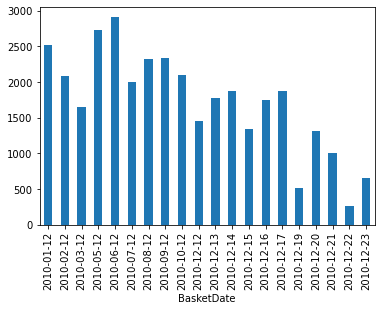

In [6]:
df_2010 = df[df["BasketDate"].dt.year == 2010]

print(df_2010["BasketDate"].dt.date.nunique())

df_2010.groupby(df["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar")

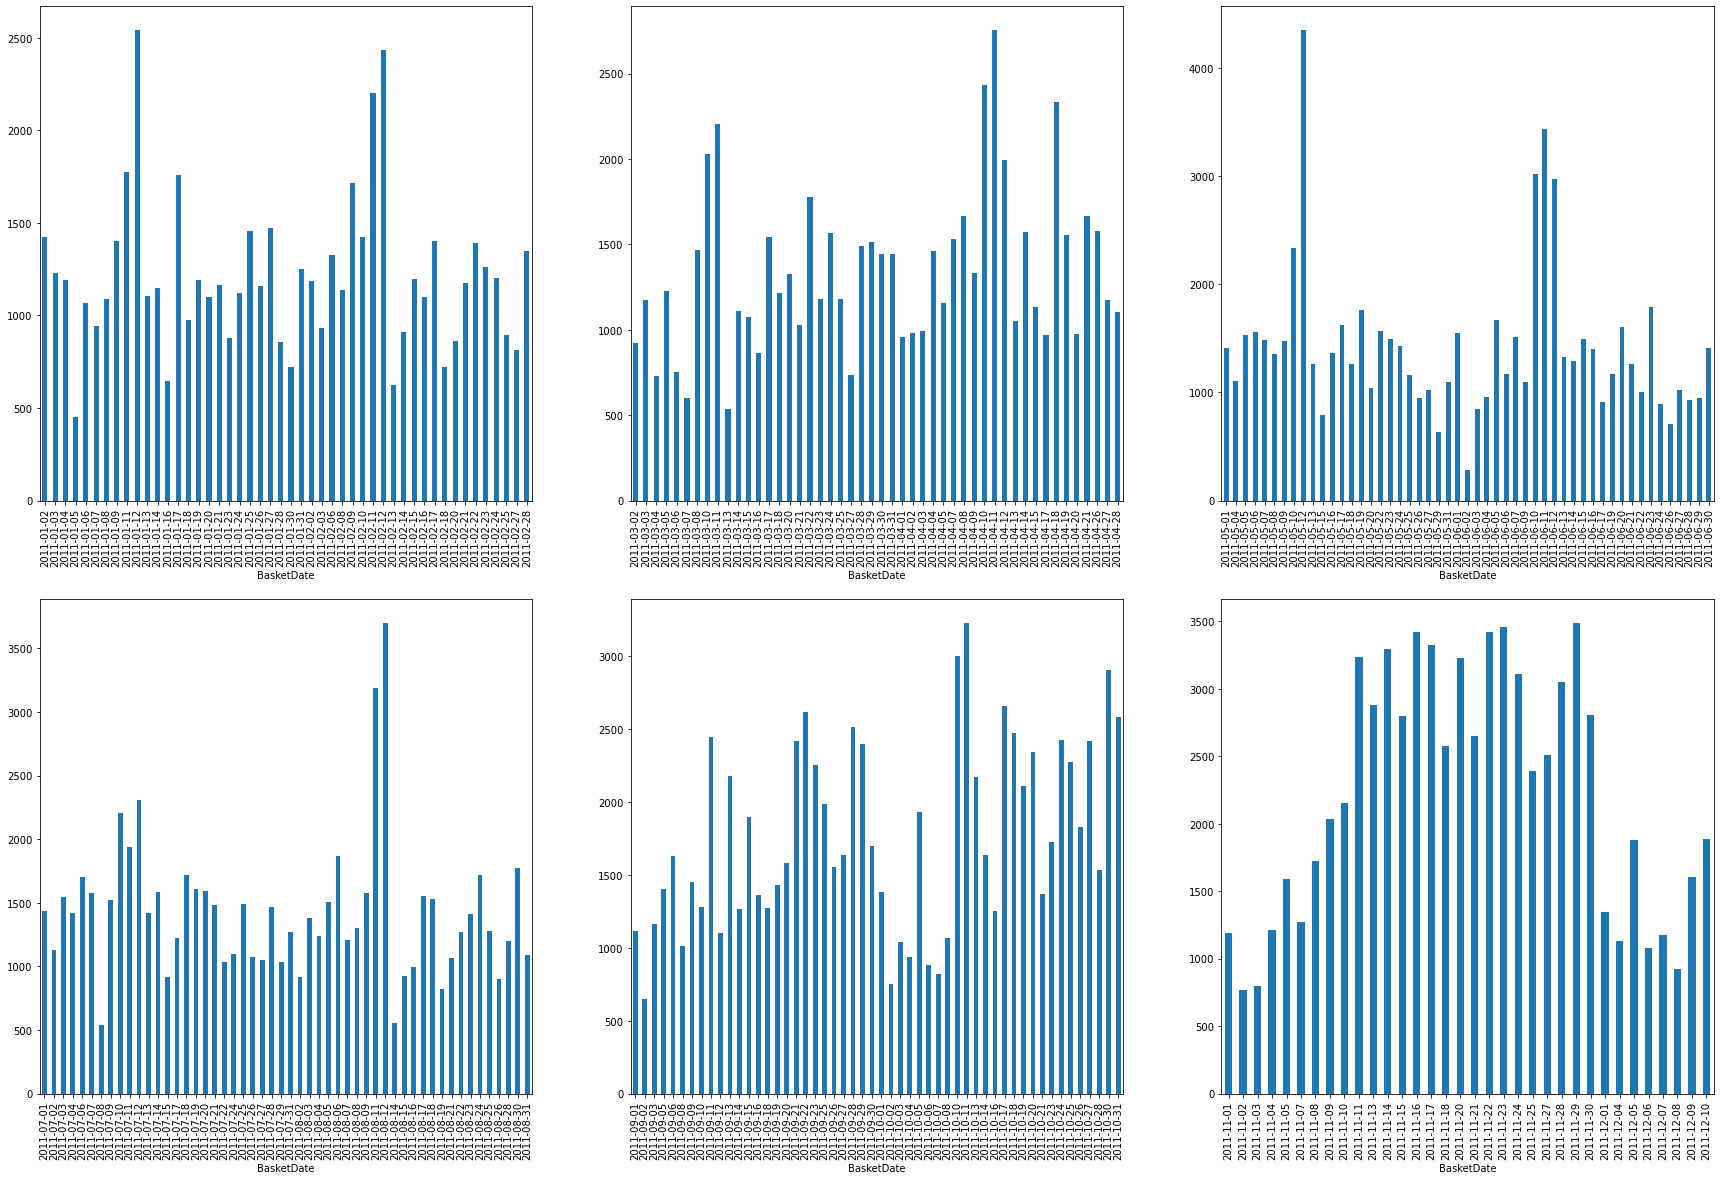

In [7]:
df_2011 = df[df["BasketDate"].dt.year == 2011]

plt.figure(figsize=(30, 20))

j = 1
for i in range(1, 12, 2):
    df_months = df_2011[df["BasketDate"].dt.month.between(i, i+1)]
    plt.subplot(2, 3, j)
    df_months.groupby(df_months["BasketDate"].dt.date)["BasketID"].count().plot(kind="bar", ax = plt.gca())
    j += 1

Numero di BasketID per mese:

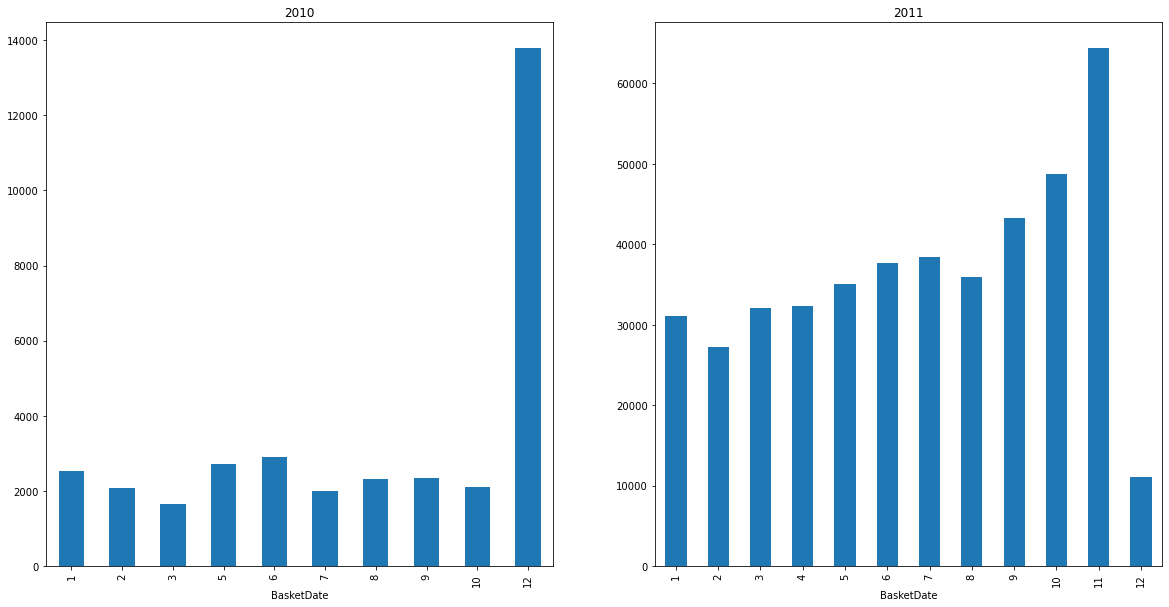

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
df_2010.groupby(df["BasketDate"].dt.month)["BasketID"].count().plot(kind="bar", ax=plt.gca(), title=2010)
plt.subplot(1, 2, 2)
df_2011.groupby(df["BasketDate"].dt.month)["BasketID"].count().plot(kind="bar", ax=plt.gca(), title=2011)

## Date e ore di maggiore traffico nei negozi

Di seguito si mostrano i diagrammi a barre contenenti il numero di `BasketID` per ora del giorno.

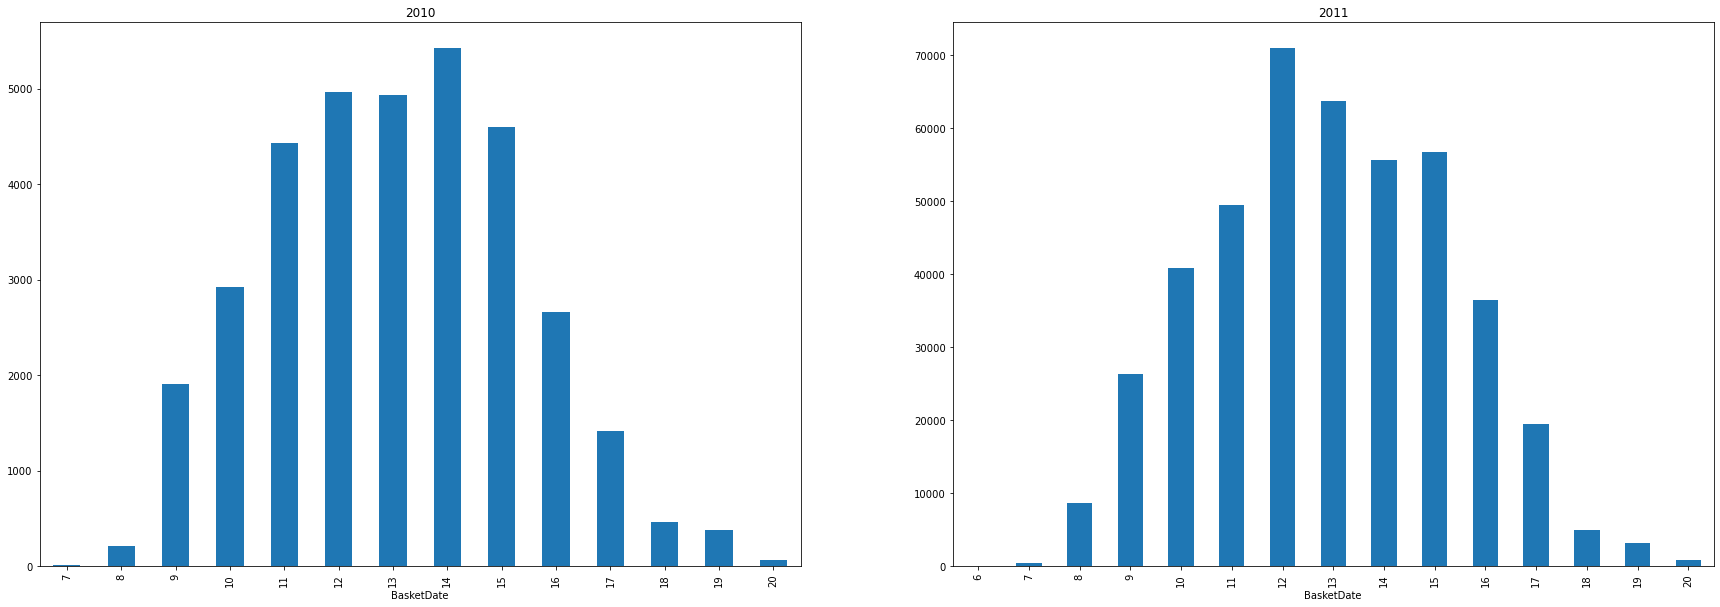

In [9]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
df_2010.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar", ax=plt.gca(), title=2010)
plt.subplot(1, 2, 2)
df_2011.groupby(df["BasketDate"].dt.hour)["BasketID"].count().plot(kind="bar", ax=plt.gca(), title=2011)

## Paesi in cui sono stati effettuati piu acquisti

<AxesSubplot:title={'center':'Best buy coutry'}, xlabel='CustomerCountry'>

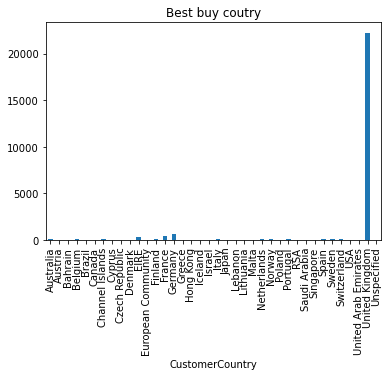

In [10]:
df.groupby('CustomerCountry')["BasketID"].nunique().plot(kind='bar', title='Best buy coutry')

In [11]:
#verificare a cosa è dovuta la variazione di prezzo
df.groupby(["ProdID",'Qta'])["Sale"].unique()

ProdID        Qta
10002         -3                  [0.0]
               1     [0.85, 1.66, 1.63]
               2     [1.66, 0.85, 1.63]
               3                 [0.85]
               4                 [0.85]
                            ...        
gift_0001_30   1          [25.53, 25.0]
               30                 [0.0]
gift_0001_40   1         [34.04, 33.33]
gift_0001_50   1                [41.67]
m              1                 [2.55]
Name: Sale, Length: 42152, dtype: object

# VARIABLES TRANSFORMATION & GENERATION

## Prezzo nullo

I record con prezzo 0 si considerano missing values, per cui si cerca di recuperare il valore di `Sale` a partire dalla media dei prezzi dello stesso `ProdID`.

In [12]:
df["Sale"] = df.groupby("ProdID")["Sale"].transform(
    lambda group: group.replace(
        to_replace = 0,
        method = "ffill",
        value = group.mean()
    )
)

## ProdDescr non disponibile

Per rendere più interpretabili certe analisi riteniamo che sia utile recuperare la `ProdDescr` degli elementi che non l'hanno settata. Analogamente al caso precedente, si costruisce una funzione che recupera la descrizione di ogni prodotto dagli altri record.

In [13]:
def replace_first_notna(group: pd.Series, column: str):
    # Indice del primo record con ProdID comune non NaN
    i: int = group.first_valid_index()
    # Se i è None non ci sono ProdDescr valide
    if i is None:
        return group
    # Valore di ProdDescr valido
    value = df.loc[i][column]
    return group.fillna(value)
 
df["ProdDescr"] = df.groupby("ProdID")["ProdDescr"].transform(lambda x: replace_first_notna(x, "ProdDescr"))

# ASSESSING DATA QUALITY (MISSING VALUES, OUTLIERS)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         471910 non-null  object        
 1   BasketDate       471910 non-null  datetime64[ns]
 2   Sale             471910 non-null  float64       
 3   CustomerID       406830 non-null  float64       
 4   CustomerCountry  471910 non-null  object        
 5   ProdID           471910 non-null  object        
 6   ProdDescr        471846 non-null  object        
 7   Qta              471910 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 52.4+ MB


Si osserva che le uniche quantità settate a `NaN` sono `CustomerID` e le `ProdDescr`. I record che non hanno `CustomerID` non portano informazioni riguardo al profilo del cliente, mentre la `ProdDescr` può essere recuperata dai record con lo stesso `ProdID`.

In [15]:
df.drop(df[df["CustomerID"].isnull()].index, inplace=True)

## Outliers nella quantità (`Qta`)

La distribuzione della quantità segue la seguente distribuzione:

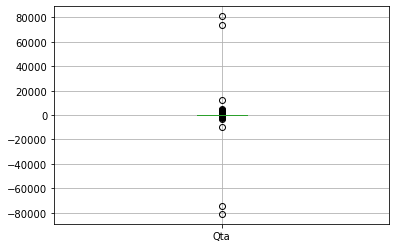

In [16]:
df.boxplot(column=['Qta'])

Eliminiamo quindi i record la cui distanza interquartile è troppo alta:

In [17]:
def drop_iqr(column, treshold=1.5):
    global df
    data = df[column]
    Q1 = data.quantile(q = 0.25)
    Q3 = data.quantile(q = 0.75)
    IQR = data.apply(iqr)
    #only keep rows in dataframe that have values within treshold*IQR of Q1 and Q3
    df = df[~((df[column] < (Q1-treshold*IQR)) | (df[column] > (Q3+treshold*IQR)))]
drop_iqr("Qta")

<AxesSubplot:>

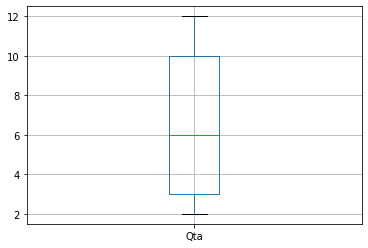

In [18]:
df.boxplot(column=["Qta"])

In [19]:
df["Qta"].describe()

count    258672.000000
mean          6.345921
std           3.854959
min           2.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          12.000000
Name: Qta, dtype: float64

In [20]:
df["Qta"]

0          6
1          6
2          8
3          6
4          6
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Qta, Length: 258672, dtype: int64

<AxesSubplot:>

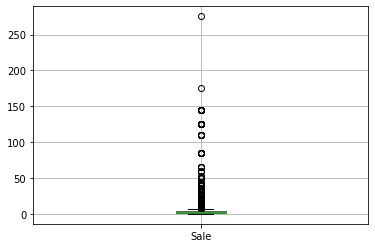

In [21]:
df.boxplot(column=["Sale"])

# PAIRWISE CORRELATION & ELIMINATION OF REDUNTANT VARIABLES

Si discretizzano le variabili non numeriche all'interno del dataset:

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy = df.copy()
for column in {"BasketID", "BasketDate", "CustomerCountry", "ProdID", "ProdDescr"}:
    df_copy[column] = le.fit_transform(df_copy[column].astype(str))

Si definisce la matrice di correlazione tra gli attributi:

<AxesSubplot:>

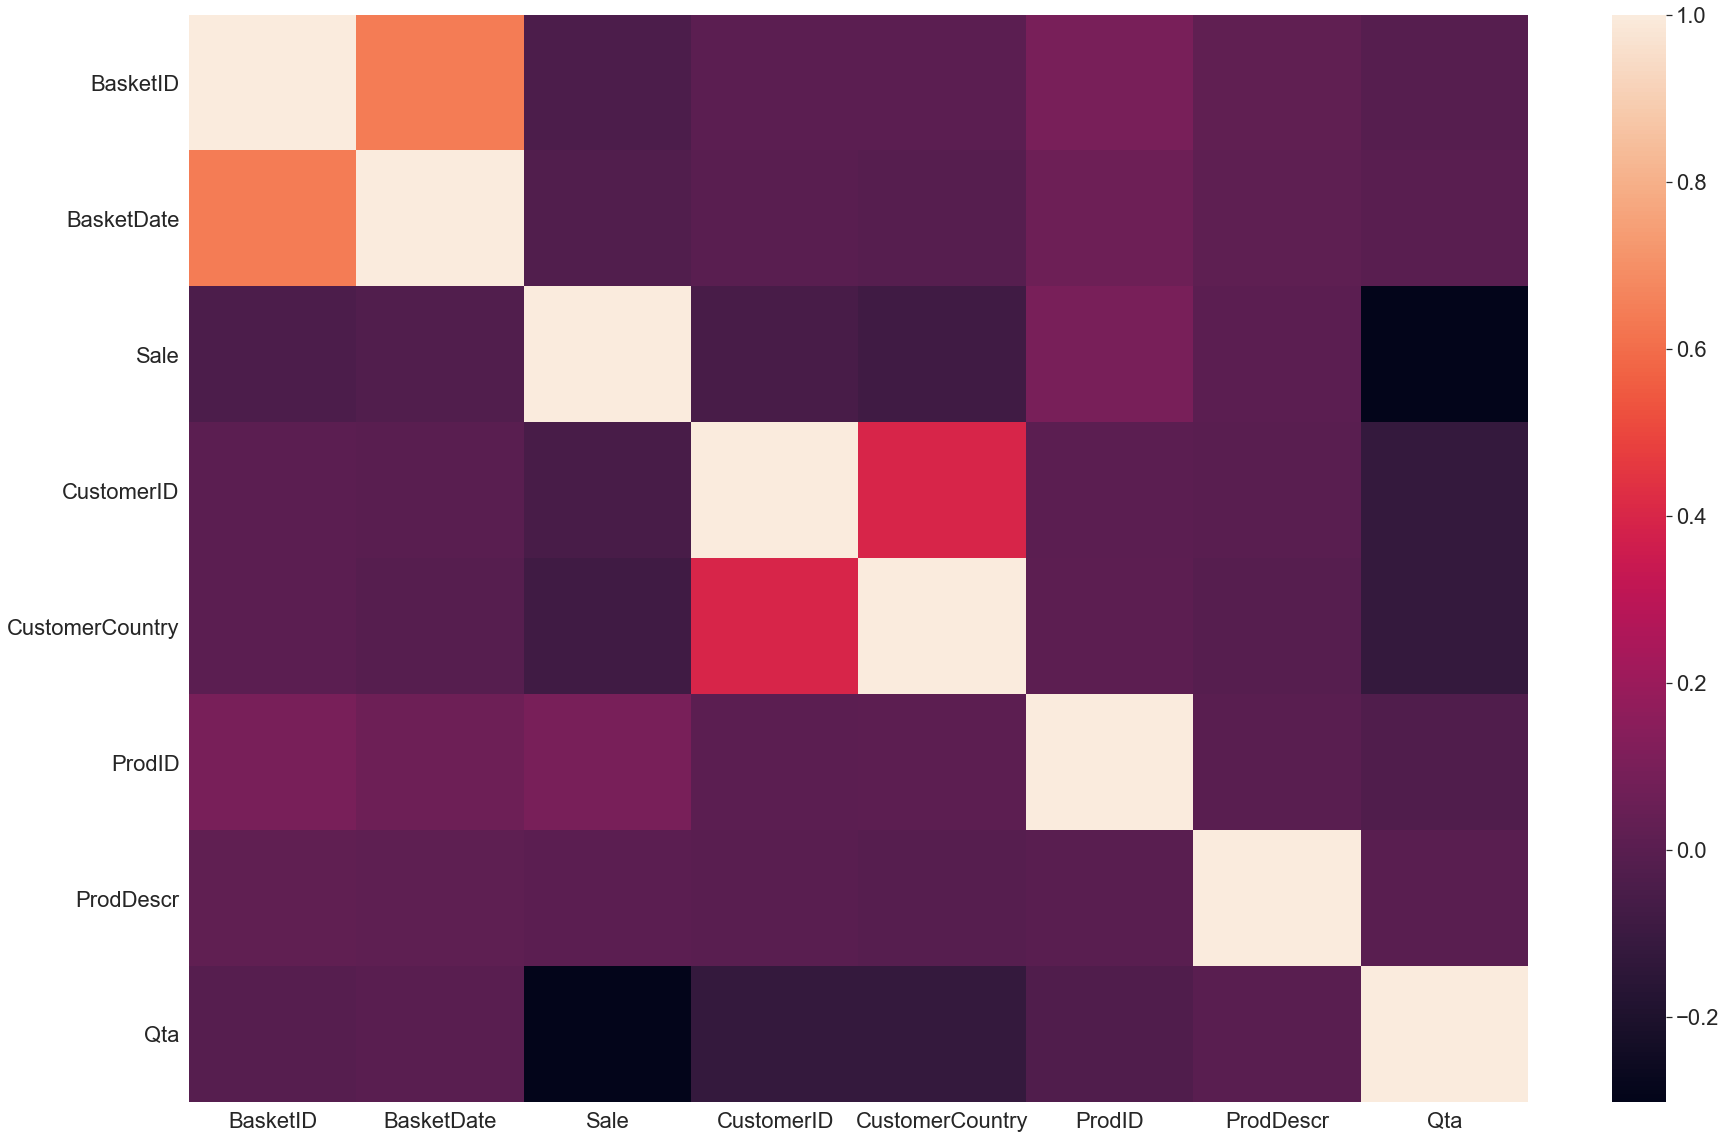

In [23]:
corr = df_copy.corr()

plt.figure(figsize=(30, 20))
sn.set(font_scale=2)
sn.heatmap(corr)

Dato che non si osservano correlazioni notevoli (maggiori dell'80%) non è il caso di eliminare attributi ridondanti.

In [24]:
df.to_csv("../../preprocessed.csv")